Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df= pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Data Analysis

In [6]:
df.shape

(14999, 10)

In [3]:
left= df[df.left==1] #see how many employed left the company
left.shape

(3571, 10)

In [4]:
retained= df[df.left==0] #see how many employed retained 
retained.shape

(11428, 10)

finding average for all columns

In [5]:
df.groupby('left').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_2932\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Analysing the above data following conclusions can be made
1) "satisfaction_level" ~ seems relatively lower for those left(0.440098) vs retained (0.666810) to the company.
2) "average_montly_hours"~ Average Monthly hours are higher who left(207.419210) with a comparison to who retained (199.060203) in the company.
3) "Work_accident"~seems very lower for those who left(4.73%) vs who retained (17.50%) in the company.
4) "promotion_last_5years"~~ Those who left the company has lower promotion rate which is 0.005321 in comparison to who retained (0.026251) i the last 5 years.

#Plot bar charts showing impact of employee salaries on retention

              #Impact of salary on employee retention 

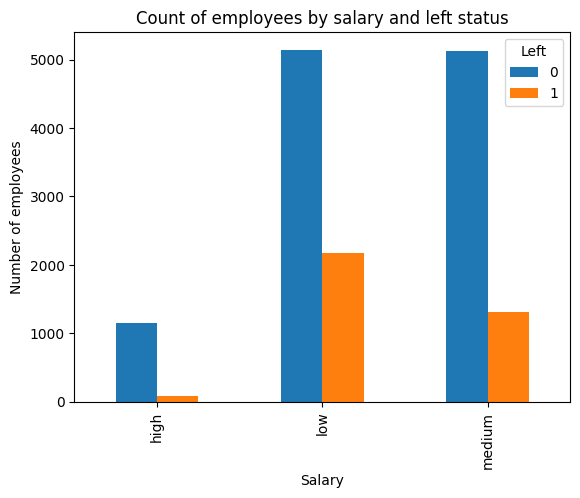

In [45]:
cross_tab= pd.crosstab(df['salary'], df['left'])
#computes the cross-tabulation of these two columns, creating a table that shows the counts of each combination of 'salary' and 'left' values.
cross_tab.plot(kind='bar')
plt.xlabel('Salary')
plt.ylabel('Number of employees')
plt.title('Count of employees by salary and left status')
plt.legend(title= 'Left')
plt.show()
    

In [ ]:
#alternative way
# pd.crosstab(df.salary, df.left).plot(kind='bar')

        #Department wise employee retention rate

In [46]:
cross_tab1= pd.crosstab(df['Department'], df['left'])
cross_tab1

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


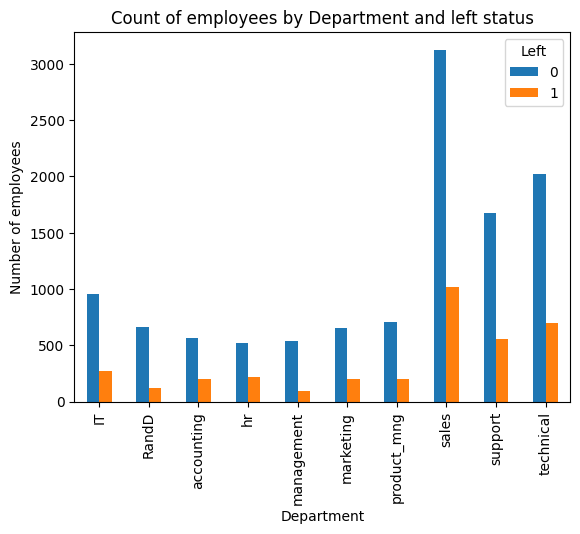

In [47]:
cross_tab1.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.title('Count of employees by Department and left status')
plt.legend(title= 'Left')
plt.show()

From above chart there seem to be some impact of department on employee retention but it is not the major so we can ignore department in our analysis.

From the above data analysis so far we can conclude that we will use the follwing variables as independent variable ~
1) satisfaction_level
2) average_montly_hours
3) promotion_last_5years
4) Salary

In [48]:
newdf= df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


       #Handling salary column text data

All the data in the salary column  are in text type. We need to convert these text data into numbers. For that we need to use dummy variable.

In [49]:
salary_dummies = pd.get_dummies(newdf.salary, prefix='salary') 
salary_dummies.head()
#prefix='salary' ~~ the resulting dummy variables will have column names that start with "salary" followed by an underscore

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [50]:
df_dummies= pd.concat([newdf, salary_dummies], axis= 'columns')
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [51]:
df_dummies.drop('salary', axis= 'columns', inplace=True)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


      #Building Logistic Regression Model

In [52]:
X= df_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [54]:
y=df.left

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size= 0.3)

In [56]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

      #Accuracy of the model

In [64]:
model.score(X_test, y_test)

0.7740952380952381